<a href="https://colab.research.google.com/github/huongmo178/Portfolio-Optimization/blob/main/PortfolioOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#creat and draw a graph (network)
import networkx as nx
import matplotlib.pyplot as plt
# load data
import pandas as pd
import numpy as np
import yfinance as yf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load datas
df_raw = pd.read_csv("/content/drive/MyDrive/CafeF.HSX.Upto18.09.2023.csv")
df_raw.columns = ["Ticker",'TradingDate', 'Open', 'High', 'Low', 'Close','Total Trade Quantity']

df_raw['TradingDate'] = pd.to_datetime(df_raw['TradingDate'],format='%Y%m%d')

df_stock = df_raw.pivot_table( index='TradingDate',columns='Ticker', values ='Close').loc["2018-09-18":"2023-09-18"]

df_stock = df_stock.dropna(subset=['VNAll-INDEX'])

df_stock =df_stock.dropna(axis=1)

In [ ]:
# tách vnindex
vnindex= pd.DataFrame(index=df_stock.index, columns=["Close"], data = df_stock["VNAll-INDEX"].values)
# xóa cột vnindex
df_stock = df_stock.drop(["VNAll-INDEX"], axis=1)

In [ ]:
df_stock1 = df_raw.pivot_table( index='TradingDate',columns='Ticker', values ='Total Trade Quantity').loc["2018-09-18":"2023-09-18"]
df_stock1 = df_stock1.dropna(subset=['VNAll-INDEX'])
df_stock1 =df_stock1.dropna(axis=1)
df_stock1 = df_stock1.drop(["VNAll-INDEX"], axis=1)
df_stock2 = df_stock1.loc["2022-09-18":"2023-09-18"]

In [ ]:
# Tính trung bình 'Total Trade Quantity' cho từng cổ phiếu
average_daily_volume_per_stock = df_stock2.mean()
# Chọn những cổ phiếu có trung bình lượng giao dịch lớn hơn 1 triệu
selected_stocks = average_daily_volume_per_stock[average_daily_volume_per_stock > 100000].index
# count stock
number_selected_stocks = len(selected_stocks)
print("The stock has an average transaction amount greater than 1 milliom:", number_selected_stocks)
# Hiển thị danh sách các cổ phiếu được chọn


The stock has an average transaction amount greater than 1 milliom: 135


In [ ]:
data = df_stock[selected_stocks]
data.head()

Ticker,AGR,ANV,APG,ASM,BCG,BFC,BID,BMI,BMP,BVH,...,VNE,VNM,VOS,VPB,VPG,VPH,VPI,VRE,VSC,YEG
TradingDate,,,,,,,,,,,,,,,,,,,,,
2018-09-18,3.5743,17.3922,3.5563,7.1492,3.9361,18.8916,26.5230,15.8117,37.2867,87.1992,...,5.1314,91.3605,1.83,9.0567,5.9784,5.2705,26.5606,29.3363,15.2601,235.0
2018-09-19,3.5743,17.1518,3.6277,7.1492,4.1610,18.4794,26.5606,15.6149,37.4139,87.6487,...,5.2490,91.2281,1.89,9.2419,6.3875,5.2564,26.6855,29.3363,15.1534,229.0
2018-09-20,3.5843,16.9915,3.8779,7.0929,4.0429,18.7542,26.7111,15.5493,37.6685,88.0982,...,5.1676,90.0364,1.87,9.5568,6.4504,5.1505,26.7479,29.7724,15.6158,229.0
2018-09-21,3.7939,17.1918,3.8839,7.2055,4.1666,18.4451,26.5606,15.7789,38.3048,87.8285,...,5.1585,91.2281,1.84,9.7420,6.3875,5.2916,26.7479,30.0102,15.3668,230.0
2018-09-24,3.8438,17.7128,4.1103,7.1773,4.1666,18.5481,26.2596,15.6805,40.0864,87.8285,...,5.2128,90.6984,1.85,9.6124,6.3560,5.3128,26.7167,31.3185,15.4735,221.5


In [ ]:
# tách train và test
date  = '2022-11-15'

data_train = data.loc[:date]
data_test = data.loc[date:  ]
vnindex_train = vnindex.loc[:date]
vnindex_test =  vnindex.loc[date: ]

In [ ]:
print("Train:",data_train.shape)
print("Test:",data_test.shape)

Train: (621, 135)
Test: (209, 135)


**Function tính return**

In [ ]:
# Tính returns
def get_returns(df):
    return np.log(df/df.shift(1)).dropna()

In [ ]:
datathu = get_returns(data_train)

In [ ]:
# Correlation matrix
corr = datathu.corr()

In [ ]:
distance_matrix = np.sqrt(2*(1-corr))

In [ ]:
# crete graph from matrix
d2 = distance_matrix
G_stock = nx.from_pandas_adjacency(d2)
print(d2)

Ticker       AGR       ANV       APG       ASM       BCG       BFC       BID  \
Ticker                                                                         
AGR     0.000000  1.226644  1.091331  1.107817  0.958632  1.337546  1.080154   
ANV     1.226644  0.000000  1.252752  1.052631  1.158550  1.098639  1.188367   
APG     1.091331  1.252752  0.000000  1.142804  0.982964  1.271018  1.311446   
ASM     1.107817  1.052631  1.142804  0.000000  1.027767  1.054348  1.235866   
BCG     0.958632  1.158550  0.982964  1.027767  0.000000  1.301996  1.181255   
...          ...       ...       ...       ...       ...       ...       ...   
VPH     1.110920  1.260994  1.075344  1.132371  1.034738  1.265747  1.250892   
VPI     1.110383  1.267103  1.180779  1.200800  1.099892  1.263104  1.348418   
VRE     1.041437  1.165685  1.299725  1.191285  1.163357  1.363872  0.989309   
VSC     1.284584  1.128513  1.252957  1.092236  1.298295  1.111654  1.281662   
YEG     1.528686  1.267933  1.467630  1.

In [ ]:
def get_opption(degrees, scale = 200):
    nodes_size = [10+item*scale for item in degrees]
    nodes_color = [item for item in degrees]
    options = {
    "font_size": 10,
    "node_size": nodes_size,
    "node_color": nodes_color,
    "edgecolors": "black",
    "linewidths": 0.2,
    "width": 0.4,
    "alpha":0.6
    }
    return options
    dict(G_stock.degree).values()

In [ ]:
T = nx.minimum_spanning_tree(G_stock)
# Tính toán ma trận khoảng cách ngắn nhất (trong trường hợp này ta sử dụng filtering bằng minimun spanning tree)
shortest_paths = dict(nx.all_pairs_dijkstra_path_length(T))

# Chuyển kết quả thành DataFrame
df_path2 = pd.DataFrame(shortest_paths)
print(df_path2)

          AGR        ANV        APG       ASM       BCG        BFC        BID  \
AGR  0.000000   4.331761   3.611946  2.668218  2.543389   5.177863   3.859976   
CTS  0.821666   3.510095   4.433612  1.846552  1.721723   5.999529   3.038310   
PVT  0.900213   5.231974   2.711733  3.568431  3.443602   4.277650   4.760189   
FIT  0.959776   5.291537   4.571722  3.627994  3.503165   6.137639   4.819753   
SSI  1.566936   4.255365   5.178881  2.591822  2.466993   6.744798   2.293041   
..        ...        ...        ...       ...       ...        ...        ...   
TNI  8.837042   9.726113  12.448987  8.062570  7.937741  14.014904  11.053686   
VNM  8.940616   9.829687  12.552562  8.166144  8.041316  14.118479  11.157261   
SAM  9.413429  10.302500  13.025374  8.638957  8.514128  14.591291  11.630073   
OGC  9.554506  10.443577  13.166451  8.780034  8.655205  14.732368  11.771150   
EVE  9.867140  10.756211  13.479085  9.092668  8.967839  15.045002  12.083784   

           BMI        BMP  

**Chuỗi biến động**

In [ ]:
pip install arch

In [ ]:

from arch import arch_model

# Khởi tạo một DataFrame để lưu trữ độ biến động của tất cả các cột
KC = pd.DataFrame()

# Lặp qua từng cột và tính toán chuỗi lợi suất và độ biến động
for col in data.columns:
    # Tính chuỗi lợi suất
    returnsI = get_returns(data_train[col])

    # Khởi tạo mô hình GARCH(1,1)
    model = arch_model(returnsI, vol='GARCH', p=1, q=1)

    # Ước tính các tham số của mô hình
    results = model.fit()

  # Tính toán phương sai có điều kiện từ mô hình GARCH(1,1)
    cond_var = results.conditional_volatility

    # Lưu trữ độ biến động của cột hiện tại vào DataFrame
    KC[col] = cond_var

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001759. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001451. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

Iteration:      1,   Func. Count:      6,   Neg. LLF: 141295552459.90906
Iteration:      2,   Func. Count:     17,   Neg. LLF: 28325.328471448178
Iteration:      3,   Func. Count:     26,   Neg. LLF: 1006.1571829095719
Iteration:      4,   Func. Count:     35,   Neg. LLF: 12024.833097230541
Iteration:      5,   Func. Count:     45,   Neg. LLF: -1075.2390274091074
Iteration:      6,   Func. Count:     51,   Neg. LLF: 301093881.3917903
Iteration:      7,   Func. Count:     58,   Neg. LLF: -1082.843650356577
Iteration:      8,   Func. Count:     65,   Neg. LLF: -1076.3255322450602
Iteration:      9,   Func. Count:     72,   Neg. LLF: -1115.7869609173058
Iteration:     10,   Func. Count:     77,   Neg. LLF: -1115.7869641784307
Iteration:     11,   Func. Count:     81,   Neg. LLF: -1115.7869641782663
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1115.7869641784307
            Iterations: 11
            Function evaluations: 81
            Gradien

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001562. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0007965. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarnin

Iteration:      1,   Func. Count:      6,   Neg. LLF: 376573.9824027924
Iteration:      2,   Func. Count:     17,   Neg. LLF: 965.7080458431195
Iteration:      3,   Func. Count:     26,   Neg. LLF: -1123.3520677523975
Iteration:      4,   Func. Count:     31,   Neg. LLF: -1123.562922303387
Iteration:      5,   Func. Count:     36,   Neg. LLF: -1054.238390733104
Iteration:      6,   Func. Count:     42,   Neg. LLF: -1085.792294065004
Iteration:      7,   Func. Count:     48,   Neg. LLF: 86.46245557746387
Iteration:      8,   Func. Count:     54,   Neg. LLF: 336.42004538257254
Iteration:      9,   Func. Count:     61,   Neg. LLF: 74.5871114290565
Iteration:     10,   Func. Count:     67,   Neg. LLF: 86.67910370843609
Iteration:     11,   Func. Count:     73,   Neg. LLF: -1112.6115991163608
Iteration:     12,   Func. Count:     79,   Neg. LLF: 9346.212204872267
Iteration:     13,   Func. Count:     88,   Neg. LLF: 20743600.201804828
Iteration:     14,   Func. Count:     99,   Neg. LLF: -4

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006716. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001458. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarnin

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7649312465.284727
Iteration:      2,   Func. Count:     17,   Neg. LLF: 10559.735711545402
Iteration:      3,   Func. Count:     28,   Neg. LLF: 1734.8070806057278
Iteration:      4,   Func. Count:     37,   Neg. LLF: 215640912011.99084
Iteration:      5,   Func. Count:     48,   Neg. LLF: 263644.9541291583
Iteration:      6,   Func. Count:     59,   Neg. LLF: 46999.029441972685
Iteration:      7,   Func. Count:     70,   Neg. LLF: 1777.3359825052407
Iteration:      8,   Func. Count:     79,   Neg. LLF: 66724168412.97136
Iteration:      9,   Func. Count:     89,   Neg. LLF: -1408.416330767168
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1408.4163297800446
            Iterations: 13
            Function evaluations: 89
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 18848352438.20416
Iteration:      2,   Func. Count:     17,   Neg. LLF: 945.055416

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0008408. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001387. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarnin

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2826615.7129055923
Iteration:      2,   Func. Count:     17,   Neg. LLF: 86322107.08641322
Iteration:      3,   Func. Count:     30,   Neg. LLF: 653381662560.9973
Iteration:      4,   Func. Count:     43,   Neg. LLF: 1770.4783278179875
Iteration:      5,   Func. Count:     53,   Neg. LLF: 338302.23582953564
Iteration:      6,   Func. Count:     63,   Neg. LLF: 873.6969679586266
Iteration:      7,   Func. Count:     73,   Neg. LLF: 361866.35080304596
Iteration:      8,   Func. Count:     79,   Neg. LLF: -1102.710264660132
Iteration:      9,   Func. Count:     87,   Neg. LLF: -1287.815478046935
Iteration:     10,   Func. Count:     94,   Neg. LLF: -1297.5561221025575
Iteration:     11,   Func. Count:    100,   Neg. LLF: -1297.5742706379756
Iteration:     12,   Func. Count:    105,   Neg. LLF: -1297.5742767667866
Iteration:     13,   Func. Count:    109,   Neg. LLF: -1297.5742767668826
Optimization terminated successfully    (Exit mode

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002445. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001381. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

Iteration:      6,   Func. Count:     46,   Neg. LLF: -1369.1675981932444
Iteration:      7,   Func. Count:     52,   Neg. LLF: 1120.747529894573
Iteration:      8,   Func. Count:     59,   Neg. LLF: -1373.1898241058057
Iteration:      9,   Func. Count:     65,   Neg. LLF: -1428.5186632216348
Iteration:     10,   Func. Count:     71,   Neg. LLF: -1429.5916139119972
Iteration:     11,   Func. Count:     76,   Neg. LLF: -1429.615103206418
Iteration:     12,   Func. Count:     81,   Neg. LLF: -1429.6158523995173
Iteration:     13,   Func. Count:     86,   Neg. LLF: -1429.6158549550669
Iteration:     14,   Func. Count:     92,   Neg. LLF: -1429.6158954411387
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1429.6158973811084
            Iterations: 14
            Function evaluations: 101
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      6,   Neg. LLF: 930672.0889733538
Iteration:      2,   Func. Count:     16,   Neg. LLF:

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002645. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002015. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

Iteration:      2,   Func. Count:     17,   Neg. LLF: 3166158.413229237
Iteration:      3,   Func. Count:     28,   Neg. LLF: -13.34895854919261
Iteration:      4,   Func. Count:     36,   Neg. LLF: 10694665999.182314
Iteration:      5,   Func. Count:     47,   Neg. LLF: 18344714994.10345
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1460.4151201094023
            Iterations: 6
            Function evaluations: 56
            Gradient evaluations: 5
Iteration:      1,   Func. Count:      6,   Neg. LLF: 220948929.9032535
Iteration:      2,   Func. Count:     17,   Neg. LLF: 37826.73676736563
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1117.943039318234
Iteration:      4,   Func. Count:     35,   Neg. LLF: -1267.477183492797
Iteration:      5,   Func. Count:     42,   Neg. LLF: -1172.9236392189252
Iteration:      6,   Func. Count:     48,   Neg. LLF: 6090657.080929355
Iteration:      7,   Func. Count:     59,   Neg. LLF: 190.2542045

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001525. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0008169. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarnin

Iteration:      3,   Func. Count:     27,   Neg. LLF: -1100.5476905549317
Iteration:      4,   Func. Count:     33,   Neg. LLF: -1181.6334920171832
Iteration:      5,   Func. Count:     39,   Neg. LLF: -299.25016951646916
Iteration:      6,   Func. Count:     46,   Neg. LLF: -1193.917366967005
Iteration:      7,   Func. Count:     51,   Neg. LLF: -1193.186874529007
Iteration:      8,   Func. Count:     57,   Neg. LLF: -817.598107246069
Iteration:      9,   Func. Count:     64,   Neg. LLF: -1188.9867181231111
Iteration:     10,   Func. Count:     70,   Neg. LLF: -1194.147367249198
Iteration:     11,   Func. Count:     75,   Neg. LLF: -1194.1474111102257
Iteration:     12,   Func. Count:     80,   Neg. LLF: -1194.147413123003
Iteration:     13,   Func. Count:     84,   Neg. LLF: -1194.147413123864
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1194.147413123003
            Iterations: 13
            Function evaluations: 84
            Gradient

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0023. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006496. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

Iteration:      2,   Func. Count:     17,   Neg. LLF: -698.4194334067299
Iteration:      3,   Func. Count:     24,   Neg. LLF: -984.4822462380703
Iteration:      4,   Func. Count:     32,   Neg. LLF: -1003.8642217992772
Iteration:      5,   Func. Count:     39,   Neg. LLF: -998.2824637779727
Iteration:      6,   Func. Count:     47,   Neg. LLF: -1031.0737891926333
Iteration:      7,   Func. Count:     54,   Neg. LLF: -1041.4933878918905
Iteration:      8,   Func. Count:     60,   Neg. LLF: -1041.5000453509579
Iteration:      9,   Func. Count:     64,   Neg. LLF: -1041.5000453506668
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1041.5000453509579
            Iterations: 9
            Function evaluations: 64
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 215063.8907464701
Iteration:      2,   Func. Count:     17,   Neg. LLF: -941.5430485055954
Iteration:      3,   Func. Count:     26,   Neg. LLF: -93

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0007902. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001245. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarnin

Iteration:      1,   Func. Count:      6,   Neg. LLF: 88665294571.79817
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1733313.3611771644
Iteration:      3,   Func. Count:     28,   Neg. LLF: 7217851.360712412
Iteration:      4,   Func. Count:     39,   Neg. LLF: 390891.13581844384
Iteration:      5,   Func. Count:     49,   Neg. LLF: 72100597.26953316
Iteration:      6,   Func. Count:     60,   Neg. LLF: 26277.835099871736
Iteration:      7,   Func. Count:     68,   Neg. LLF: -1245.1460755991106
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1245.14607280559
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 5054966.259354984
Iteration:      2,   Func. Count:     17,   Neg. LLF: 937.6850935997601
Iteration:      3,   Func. Count:     25,   Neg. LLF: -1121.790539834019
Iteration:      4,   Func. Count:     32,   Neg. LLF: -1163.708376

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002043. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001554. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

Iteration:      4,   Func. Count:     32,   Neg. LLF: -957.7002045097574
Iteration:      5,   Func. Count:     38,   Neg. LLF: -1054.0021269182462
Iteration:      6,   Func. Count:     44,   Neg. LLF: -1067.291852986435
Iteration:      7,   Func. Count:     49,   Neg. LLF: -1067.2919922945462
Iteration:      8,   Func. Count:     54,   Neg. LLF: -1067.2919919032722
Iteration:      9,   Func. Count:     60,   Neg. LLF: -1067.2919923361821
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1067.291993455409
            Iterations: 9
            Function evaluations: 70
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2374644.8221011125
Iteration:      2,   Func. Count:     17,   Neg. LLF: -664.6143591471489
Iteration:      3,   Func. Count:     25,   Neg. LLF: -969.4054019678672
Iteration:      4,   Func. Count:     32,   Neg. LLF: -1127.7520323261379
Iteration:      5,   Func. Count:     39,   Neg. LLF: -11

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001994. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001227. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

Iteration:      4,   Func. Count:     38,   Neg. LLF: 719.6138619517101
Iteration:      5,   Func. Count:     47,   Neg. LLF: 606.6280367289157
Iteration:      6,   Func. Count:     56,   Neg. LLF: -1042.358914844036
Iteration:      7,   Func. Count:     63,   Neg. LLF: -985.7675492522714
Iteration:      8,   Func. Count:     71,   Neg. LLF: -866.8058756925134
Iteration:      9,   Func. Count:     77,   Neg. LLF: 7387569.535324372
Iteration:     10,   Func. Count:     88,   Neg. LLF: 296.59929064874547
Iteration:     11,   Func. Count:     97,   Neg. LLF: 819669.8121727401
Iteration:     12,   Func. Count:    106,   Neg. LLF: 2168.9941656122983
Iteration:     13,   Func. Count:    113,   Neg. LLF: 2288.2524413790134
Iteration:     14,   Func. Count:    121,   Neg. LLF: -702.8968711696049
Iteration:     15,   Func. Count:    128,   Neg. LLF: -913.9457616479301
Iteration:     16,   Func. Count:    134,   Neg. LLF: 2507752.687010904
Iteration:     17,   Func. Count:    145,   Neg. LLF: -3

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002442. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001478. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

Iteration:      4,   Func. Count:     35,   Neg. LLF: -1252.7833267717342
Iteration:      5,   Func. Count:     41,   Neg. LLF: 19049394.820359755
Iteration:      6,   Func. Count:     48,   Neg. LLF: -1252.7819860920354
Iteration:      7,   Func. Count:     54,   Neg. LLF: -1280.997595946382
Iteration:      8,   Func. Count:     61,   Neg. LLF: -1286.5952746567548
Iteration:      9,   Func. Count:     67,   Neg. LLF: -1286.9156545633846
Iteration:     10,   Func. Count:     72,   Neg. LLF: -1286.9156591471299
Iteration:     11,   Func. Count:     76,   Neg. LLF: -1286.915659146127
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1286.9156591471299
            Iterations: 11
            Function evaluations: 76
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 7566064.2941965405
Iteration:      2,   Func. Count:     17,   Neg. LLF: -1012.516467336824
Iteration:      3,   Func. Count:     25,   Neg. LLF: 

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001775. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001814. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

Iteration:      1,   Func. Count:      6,   Neg. LLF: 66314624136.8956
Iteration:      2,   Func. Count:     17,   Neg. LLF: 95703363.7826898
Iteration:      3,   Func. Count:     29,   Neg. LLF: 11598031.472678214
Iteration:      4,   Func. Count:     41,   Neg. LLF: 48033314.46935945
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1470.7491080968284
            Iterations: 4
            Function evaluations: 51
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 94162922.88626228
Iteration:      2,   Func. Count:     17,   Neg. LLF: 9567015.847390201
Iteration:      3,   Func. Count:     29,   Neg. LLF: 68164.2353534124
Iteration:      4,   Func. Count:     40,   Neg. LLF: 3955448.3816119037
Iteration:      5,   Func. Count:     51,   Neg. LLF: 1632210.644769518
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1245.1736375317118
            Iterations: 6
        

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001579. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002059. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

            Function evaluations: 27
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 48249.00919693074
Iteration:      2,   Func. Count:     18,   Neg. LLF: 234410.29608311542
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1428.403875802779
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1428.4038751637145
            Iterations: 7
            Function evaluations: 28
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 13075703.393732306
Iteration:      2,   Func. Count:     17,   Neg. LLF: 40616.67508714576
Iteration:      3,   Func. Count:     24,   Neg. LLF: -1116.0793214623186
Iteration:      4,   Func. Count:     32,   Neg. LLF: -1295.02140138267
Iteration:      5,   Func. Count:     38,   Neg. LLF: -1299.3218734810184
Iteration:      6,   Func. Count:     44,   Neg. LLF: -1299.5443238463681
Iteration:      7,   Func. Count:     49,   Neg. LLF: -1299.5

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001213. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0009037. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarnin

Iteration:      5,   Func. Count:     50,   Neg. LLF: 1755253969.791688
Iteration:      6,   Func. Count:     62,   Neg. LLF: 47190306.82436038
Iteration:      7,   Func. Count:     74,   Neg. LLF: 41311505.376313746
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1450.3812217785376
            Iterations: 10
            Function evaluations: 83
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 136994586.8924154
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2192132219.376083
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1235.9919157574413
            Iterations: 2
            Function evaluations: 27
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 85453832.34573992
Iteration:      2,   Func. Count:     18,   Neg. LLF: 23127822383836.844
Optimization terminated successfully    (Exit mode 0)
            Current f

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0007118. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001571. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarnin

Iteration:      9,   Func. Count:     58,   Neg. LLF: -1141.4861617331524
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1141.4861617331446
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 400117157.8373083
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1906551.4766582786
Iteration:      3,   Func. Count:     28,   Neg. LLF: 14283.664191986403
Iteration:      4,   Func. Count:     38,   Neg. LLF: -1433.786633108421
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1433.7866331926948
            Iterations: 8
            Function evaluations: 38
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 772787.4303950962
Iteration:      2,   Func. Count:     17,   Neg. LLF: -592.7259102560901
Iteration:      3,   Func. Count:     25,   Neg. LLF: -1350.853980986766

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001712. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001104. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7578804.441962636
Iteration:      2,   Func. Count:     17,   Neg. LLF: -485.78921426327884
Iteration:      3,   Func. Count:     27,   Neg. LLF: -880.999278252408
Iteration:      4,   Func. Count:     34,   Neg. LLF: -1106.63844927133
Iteration:      5,   Func. Count:     39,   Neg. LLF: -1054.4550446081537
Iteration:      6,   Func. Count:     46,   Neg. LLF: -1104.2824902222692
Iteration:      7,   Func. Count:     52,   Neg. LLF: -1106.8178623373612
Iteration:      8,   Func. Count:     57,   Neg. LLF: -1106.820610120583
Iteration:      9,   Func. Count:     62,   Neg. LLF: -1106.8211375590754
Iteration:     10,   Func. Count:     67,   Neg. LLF: -1106.8211376529046
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1106.82113797201
            Iterations: 10
            Function evaluations: 68
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1228

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0009109. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001451. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarnin

Iteration:      9,   Func. Count:     86,   Neg. LLF: -1184.8965854024232
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1184.8965862848465
            Iterations: 13
            Function evaluations: 86
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1795556.671367342
Iteration:      2,   Func. Count:     16,   Neg. LLF: -1232.0411559104714
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1232.04115592402
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 77448054.97899772
Iteration:      2,   Func. Count:     17,   Neg. LLF: 4908.498526263333
Iteration:      3,   Func. Count:     27,   Neg. LLF: 50880340.668487355
Iteration:      4,   Func. Count:     38,   Neg. LLF: 545.4615373777575
Iteration:      5,   Func. Count:     49,   Neg. LLF: -356.66514104477807


<ipython-input-21-95002a080ddf>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  KC[col] = cond_var
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001139. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
<ipython-input-21-95002a080ddf>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colum

Iteration:      2,   Func. Count:     17,   Neg. LLF: -1001.3919790594598
Iteration:      3,   Func. Count:     24,   Neg. LLF: -1244.1163435281887
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1106.8685835821054
Iteration:      5,   Func. Count:     38,   Neg. LLF: 8825692.625256475
Iteration:      6,   Func. Count:     49,   Neg. LLF: 56216986450257.484
Iteration:      7,   Func. Count:     60,   Neg. LLF: 7206146713623.8545
Iteration:      8,   Func. Count:     70,   Neg. LLF: -1289.3058768544288
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1289.3058773537277
            Iterations: 12
            Function evaluations: 70
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 127945825.4267967
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1276.252031961145
Iteration:      3,   Func. Count:     24,   Neg. LLF: 178.11160748128938
Iteration:      4,   Func. Count:     31,   Neg. LLF: 140722

<ipython-input-21-95002a080ddf>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  KC[col] = cond_var
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001581. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
<ipython-input-21-95002a080ddf>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colum

Iteration:      3,   Func. Count:     27,   Neg. LLF: 83611.0578761487
Iteration:      4,   Func. Count:     38,   Neg. LLF: 54968863883.95075
Iteration:      5,   Func. Count:     49,   Neg. LLF: 2155185.777592196
Iteration:      6,   Func. Count:     60,   Neg. LLF: 364788181.2823715
Iteration:      7,   Func. Count:     71,   Neg. LLF: 3186.300278270728
Iteration:      8,   Func. Count:     81,   Neg. LLF: 2278.3756591218635
Iteration:      9,   Func. Count:     92,   Neg. LLF: 5480.2377633863025
Iteration:     10,   Func. Count:    101,   Neg. LLF: 32041.33264616563
Iteration:     11,   Func. Count:    111,   Neg. LLF: 961.8501833585095
Iteration:     12,   Func. Count:    120,   Neg. LLF: -1148.9505392573305
Iteration:     13,   Func. Count:    126,   Neg. LLF: -1195.8016547269835
Iteration:     14,   Func. Count:    132,   Neg. LLF: -936.7842078935349
Iteration:     15,   Func. Count:    138,   Neg. LLF: -1207.1591555307448
Iteration:     16,   Func. Count:    143,   Neg. LLF: -1

<ipython-input-21-95002a080ddf>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  KC[col] = cond_var
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001752. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
<ipython-input-21-95002a080ddf>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colum

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8.321848329044541e+17
Iteration:      2,   Func. Count:     18,   Neg. LLF: 23004636.069115948
Iteration:      3,   Func. Count:     29,   Neg. LLF: 7805531332.767043
Iteration:      4,   Func. Count:     41,   Neg. LLF: 128541580.94446813
Iteration:      5,   Func. Count:     53,   Neg. LLF: 5130252941.336653
Iteration:      6,   Func. Count:     66,   Neg. LLF: 4900.368877969219
Iteration:      7,   Func. Count:     76,   Neg. LLF: 847869617867.4182
Iteration:      8,   Func. Count:     87,   Neg. LLF: 3234101224415854.0
Iteration:      9,   Func. Count:     98,   Neg. LLF: 953416975.2928437
Iteration:     10,   Func. Count:    110,   Neg. LLF: -1214.508102305036
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1214.5080991126447
            Iterations: 14
            Function evaluations: 110
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 370511

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006237. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
<ipython-input-21-95002a080ddf>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  KC[col] = cond_var
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y i


Iteration:      2,   Func. Count:     17,   Neg. LLF: 577.6869289273019
Iteration:      3,   Func. Count:     25,   Neg. LLF: -1407.9491820309208
Iteration:      4,   Func. Count:     32,   Neg. LLF: -1408.9831723703808
Iteration:      5,   Func. Count:     37,   Neg. LLF: -1409.0134763103667
Iteration:      6,   Func. Count:     42,   Neg. LLF: -1409.044159028413
Iteration:      7,   Func. Count:     47,   Neg. LLF: -1409.0383513650295
Iteration:      8,   Func. Count:     53,   Neg. LLF: -1409.049559603731
Iteration:      9,   Func. Count:     58,   Neg. LLF: -1409.062664203028
Iteration:     10,   Func. Count:     63,   Neg. LLF: -1409.0785211880861
Iteration:     11,   Func. Count:     68,   Neg. LLF: -1409.229452547445
Iteration:     12,   Func. Count:     73,   Neg. LLF: -1410.1362599573247
Iteration:     13,   Func. Count:     78,   Neg. LLF: -1406.379207493045
Iteration:     14,   Func. Count:     84,   Neg. LLF: 6408873394.586103
Iteration:     15,   Func. Count:     95,   Ne

<ipython-input-21-95002a080ddf>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  KC[col] = cond_var
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001012. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
<ipython-input-21-95002a080ddf>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colum

Iteration:      4,   Func. Count:     37,   Neg. LLF: 3612849861.6417675
Iteration:      5,   Func. Count:     48,   Neg. LLF: 2199.027449958331
Iteration:      6,   Func. Count:     57,   Neg. LLF: 8463.850099687892
Iteration:      7,   Func. Count:     67,   Neg. LLF: 177710453611.40558
Iteration:      8,   Func. Count:     78,   Neg. LLF: 3244632.440277843
Iteration:      9,   Func. Count:     88,   Neg. LLF: 158089.6845482767
Iteration:     10,   Func. Count:     97,   Neg. LLF: 1140.296446487875
Iteration:     11,   Func. Count:    107,   Neg. LLF: -708.5940218372981
Iteration:     12,   Func. Count:    114,   Neg. LLF: -900.7843934157678
Iteration:     13,   Func. Count:    120,   Neg. LLF: -975.6356402743556
Iteration:     14,   Func. Count:    125,   Neg. LLF: -974.1006475963529
Iteration:     15,   Func. Count:    131,   Neg. LLF: -975.7289055489657
Iteration:     16,   Func. Count:    136,   Neg. LLF: -975.7337659879593
Iteration:     17,   Func. Count:    141,   Neg. LLF: -9

<ipython-input-21-95002a080ddf>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  KC[col] = cond_var
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0009313. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
<ipython-input-21-95002a080ddf>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all col

Iteration:      5,   Func. Count:     46,   Neg. LLF: 9251.972298963594
Iteration:      6,   Func. Count:     56,   Neg. LLF: 8195513.104800282
Iteration:      7,   Func. Count:     66,   Neg. LLF: -1359.5941797132518
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1359.5941791867544
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 69087.58163318606
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1306.210648573264
Iteration:      3,   Func. Count:     24,   Neg. LLF: -783.3047836485053
Iteration:      4,   Func. Count:     29,   Neg. LLF: -783.5802299387169
Iteration:      5,   Func. Count:     34,   Neg. LLF: -429.10443575272177
Iteration:      6,   Func. Count:     40,   Neg. LLF: -465.7983832027573
Iteration:      7,   Func. Count:     46,   Neg. LLF: -783.940772440438
Iteration:      8,   Func. Count:     51,   Neg. LLF: 140896234

<ipython-input-21-95002a080ddf>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  KC[col] = cond_var


In [ ]:
# Hiển thị DataFrame chứa độ biến động của tất cả các cột
print(KC)

                  AGR       ANV       APG       ASM       BCG       BFC  \
TradingDate                                                               
2018-09-19   0.024479  0.027515  0.031357  0.023705  0.033960  0.021635   
2018-09-20   0.025890  0.027527  0.032828  0.024228  0.040196  0.025782   
2018-09-21   0.027007  0.027351  0.039707  0.024756  0.039645  0.028748   
2018-09-24   0.032494  0.027262  0.038807  0.025528  0.039644  0.030975   
2018-09-25   0.032559  0.028442  0.042327  0.025810  0.037726  0.032693   
...               ...       ...       ...       ...       ...       ...   
2022-11-09   0.040137  0.047853  0.048771  0.041618  0.053901  0.039691   
2022-11-10   0.038766  0.047741  0.047083  0.040179  0.048698  0.039691   
2022-11-11   0.043096  0.050087  0.050144  0.043479  0.052468  0.039691   
2022-11-14   0.041271  0.051999  0.052280  0.046204  0.055025  0.039691   
2022-11-15   0.042804  0.053531  0.053662  0.048454  0.056738  0.039691   

                  BID   

**tính ma trận khoảng cách cho chuối biến động**

In [ ]:
# Correlation matrix
corr1 = KC.corr()
distance_matrix1 = np.sqrt(2*(1-corr1))
# crete graph from matrix
d1 = distance_matrix1
G_stock1= nx.from_pandas_adjacency(d1)
T1 = nx.minimum_spanning_tree(G_stock1)
# Tính toán ma trận khoảng cách ngắn nhất (trong trường hợp này ta sử dụng filtering bằng minimun spanning tree)
shortest_paths1 = dict(nx.all_pairs_dijkstra_path_length(T1))

# Chuyển kết quả thành DataFrame
df_path1 = pd.DataFrame(shortest_paths1)
print(df_path1)


           AGR        ANV       APG       ASM        BCG       BFC        BID  \
AGR   0.000000  11.546858  5.410343  6.777348   1.948777  8.418232  10.706964   
VIP   0.541143  12.088001  5.951485  7.318490   2.489920  8.959374  11.248107   
LGL   0.655331  10.891527  4.755012  6.122017   1.293446  7.762901  10.051633   
DHC   0.880199  12.427057  6.290542  7.657547   2.828976  9.298431  11.587163   
SBT   1.194546  12.741404  6.604888  7.971893   3.143323  9.612777  11.901510   
..         ...        ...       ...       ...        ...       ...        ...   
LHG  11.249341   3.375305  8.033367  8.370361  10.608456  8.988978   3.512522   
VHC  11.428457   4.531532  8.212483  8.549477  10.787573  9.168094   0.721493   
VHM  11.468595   4.571670  8.252620  8.589615  10.827710  9.208231   0.761630   
ANV  11.546858   0.000000  8.330884  8.667878  10.905974  9.286495   3.810039   
DRC  11.600528   1.351318  8.384554  8.721548  10.959644  9.340165   3.863709   

           BMI        BMP  

In [ ]:
df_path = df_path1 + df_path2

**K-MEANS**

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

losses = []
K = 10
for i in range(2, K):
  # 1.  Huấn luyện với số cụm = i
  kmeans_i = KMeans(n_clusters=i, random_state=0)
  kmeans_i.fit(df_path)
  # 2. Tính _hàm biến dạng_
  # 2.1. Khoảng cách tới toàn bộ centroids
  d2centroids = cdist(df_path, kmeans_i.cluster_centers_, 'euclidean') # shape (n, k)
  # 2.2. Khoảng cách tới centroid gần nhất
  min_distance = np.min(d2centroids, axis=1) # shape (n)
  loss = np.sum(min_distance)
  losses.append(loss)

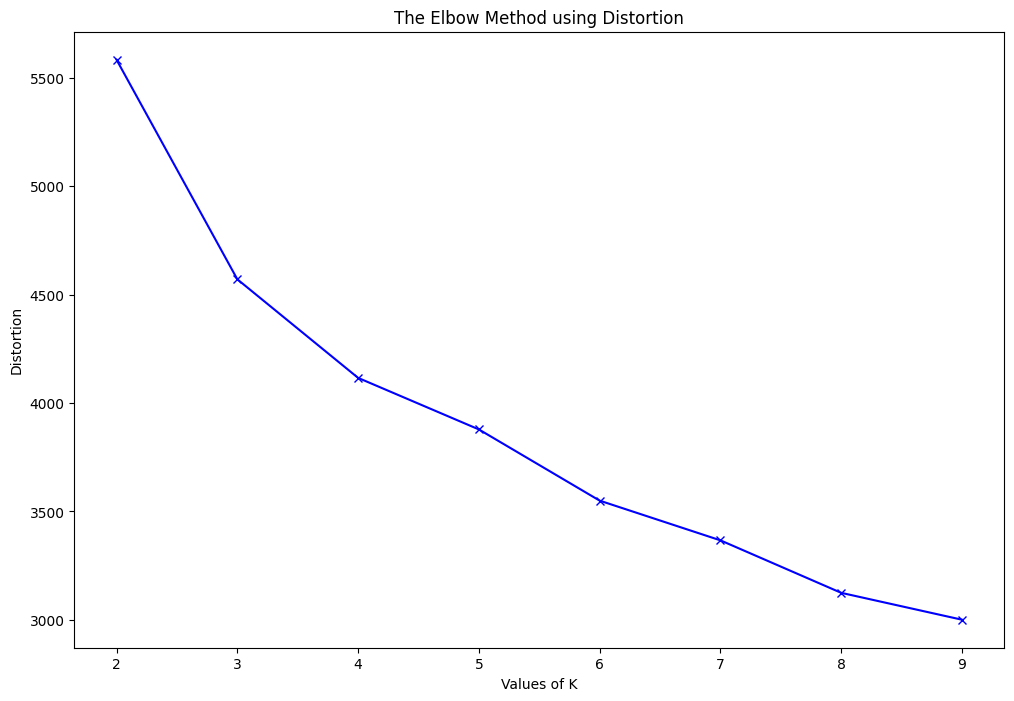

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(np.arange(2, K), losses, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_path)

KMeans(n_clusters=4, random_state=0)

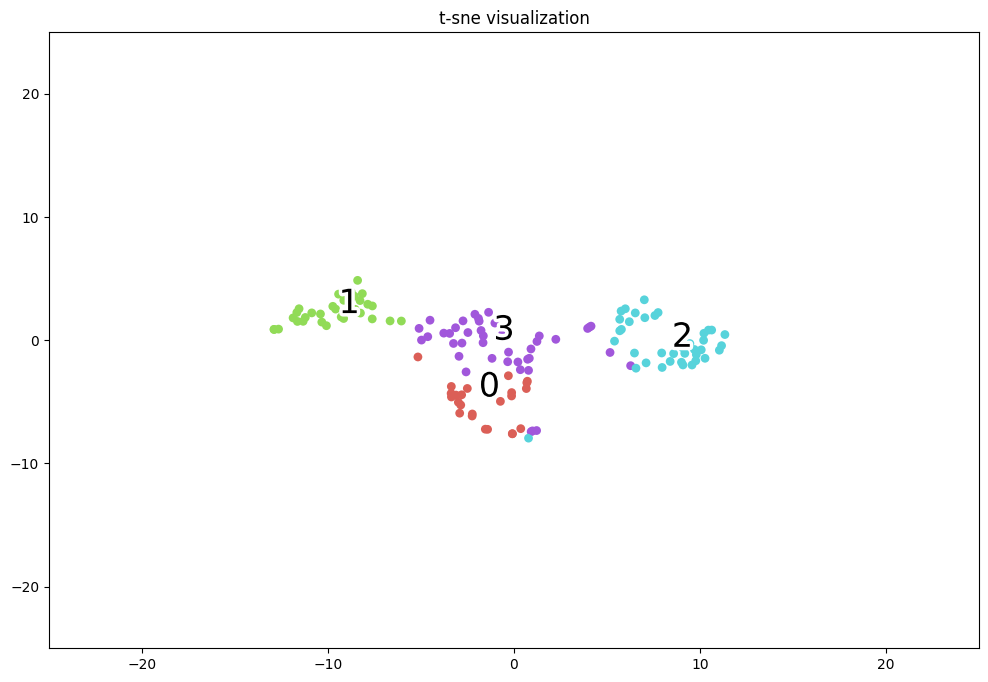

In [ ]:
from sklearn.manifold import TSNE

# Biến đổi dữ liệu về 2 chiều
X_tsne = TSNE(n_components=2, random_state=123).fit_transform(df_path)


import matplotlib.patheffects as PathEffects
import seaborn as sns
import numpy as np

def _plot_kmean_scatter(X, labels):
    '''
    X: dữ liệu đầu vào
    labels: nhãn dự báo
    '''
    # lựa chọn màu sắc
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))

    # vẽ biểu đồ scatter
    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=palette[labels.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)

    # thêm nhãn cho mỗi cluster
    txts = []

    for i in range(num_classes):
        # Vẽ text tên cụm tại trung vị của mỗi cụm
        xtext, ytext = np.median(X[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.title('t-sne visualization')

_plot_kmean_scatter(X_tsne, kmeans.predict(df_path))

**4. Stock portfolios**

In [ ]:
labels = kmeans.labels_

# Tính returns
def get_returns(df):
    return np.log(df/df.shift(1)).dropna()

def get_clusters(data,label):
    stocks = data.columns
    return [stocks[label == name] for name in np.unique(label)]

def get_portflolio(cluster,returns, k):
    # mỗi cụm lấy k% asset có sharpe lớn nhất
    portflolio = []
    for clus in cluster:
        portflolio += list((sharpe_ratio(returns[clus])).nlargest(k).index)
    return portflolio

risk_free_rate = 0.02657/365
def sharpe_ratio(returns,rf =risk_free_rate):
    return (returns.mean()-rf) / (returns.std() * np.sqrt(252))


In [ ]:
# chia các cổ phiếu theo cụm đã tính toán ở mục 3
clusters = get_clusters(data_train,labels)
clusters

[Index(['ANV', 'BFC', 'BID', 'BWE', 'DPM', 'DRC', 'DXG', 'EIB', 'FRT', 'GMD',
        'HCM', 'HDG', 'LHG', 'MBB', 'NT2', 'NVL', 'REE', 'SKG', 'SSI', 'STB',
        'TCB', 'VHC', 'VHM', 'VRE'],
       dtype='object', name='Ticker'),
 Index(['BVH', 'CII', 'DAG', 'DLG', 'EVE', 'EVG', 'HAG', 'HAR', 'HCD', 'HHS',
        'HID', 'HNG', 'HQC', 'HSL', 'ITA', 'KMR', 'LDG', 'OGC', 'QCG', 'SAM',
        'SCR', 'SJF', 'TCH', 'TDG', 'TLD', 'TNI', 'TNT', 'TTF', 'VNE', 'VNM',
        'VPH'],
       dtype='object', name='Ticker'),
 Index(['BMI', 'BMP', 'C47', 'CMX', 'DAH', 'DHC', 'DPG', 'DPR', 'FIT', 'FPT',
        'GAS', 'GIL', 'HAH', 'HAX', 'HDC', 'IJC', 'LGL', 'MSN', 'MWG', 'NAF',
        'NTL', 'PDR', 'PHR', 'PLX', 'PNJ', 'PPC', 'PTB', 'SAB', 'SBT', 'SHI',
        'TDC', 'TDH', 'TSC', 'VCB', 'VIC', 'VIP', 'VJC', 'VSC'],
       dtype='object', name='Ticker'),
 Index(['AGR', 'APG', 'ASM', 'BCG', 'CCL', 'CRE', 'CSV', 'CTD', 'CTG', 'CTI',
        'CTS', 'DCM', 'DGW', 'DIG', 'DRH', 'FCN', 'FTS', 'GEX',

<ipython-input-31-1a6a6a7c9de6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=labels, palette = 'viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, 

[Text(0, 0, '24')]

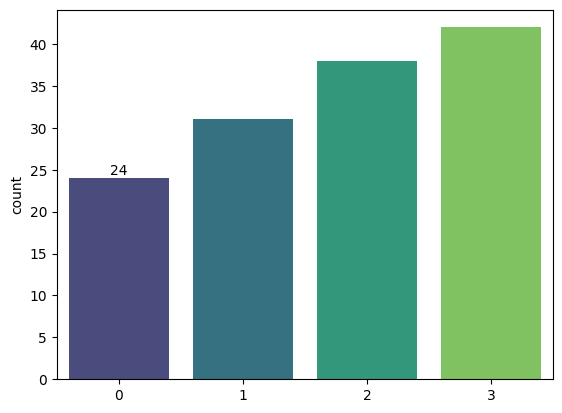

In [ ]:
import seaborn as sns
ax = sns.countplot(x=labels, palette = 'viridis')
ax.bar_label(ax.containers[0])

In [ ]:
returns_train = get_returns(data_train)
# Chọn danh mục đầu tư cổ phiếu (mỗi cluster chọn 2 cổ phiếu)
# portflolios = get_portflolio(clusters,returns_train,5)
portflolios = list(sharpe_ratio(returns_train[clusters[0]]).nlargest(1).index) + list(sharpe_ratio(returns_train[clusters[1]]).nlargest(1).index)  + list(sharpe_ratio(returns_train[clusters[2]]).nlargest(1).index) + list(sharpe_ratio(returns_train[clusters[3]]).nlargest(7).index)
portflolios

['REE', 'OGC', 'FPT', 'VPI', 'DGW', 'DCM', 'VPG', 'TCM', 'VOS', 'PET']

**5. Testing**

In [ ]:
returns_test = get_returns(data_test)
return_vn_train = get_returns(vnindex_train)
return_vn_test =  get_returns(vnindex_test)
return_vn_train.columns = ["vnindex"]
return_vn_test.columns = ["vnindex"]
data2 = df_stock.loc[:, portflolios]
returns_port = get_returns(data2)

In [ ]:
pip install Riskfolio-Lib

In [ ]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=returns_port)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:
#rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR', 'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0.02657/365 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w1 = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w1.T)

,REE,OGC,FPT,VPI,DGW,DCM,VPG,TCM,VOS,PET
weights,1.078052e-10,1.072981e-10,0.476385,0.233304,0.129599,0.093623,0.024249,0.042839,9.843602e-11,1.373637e-10


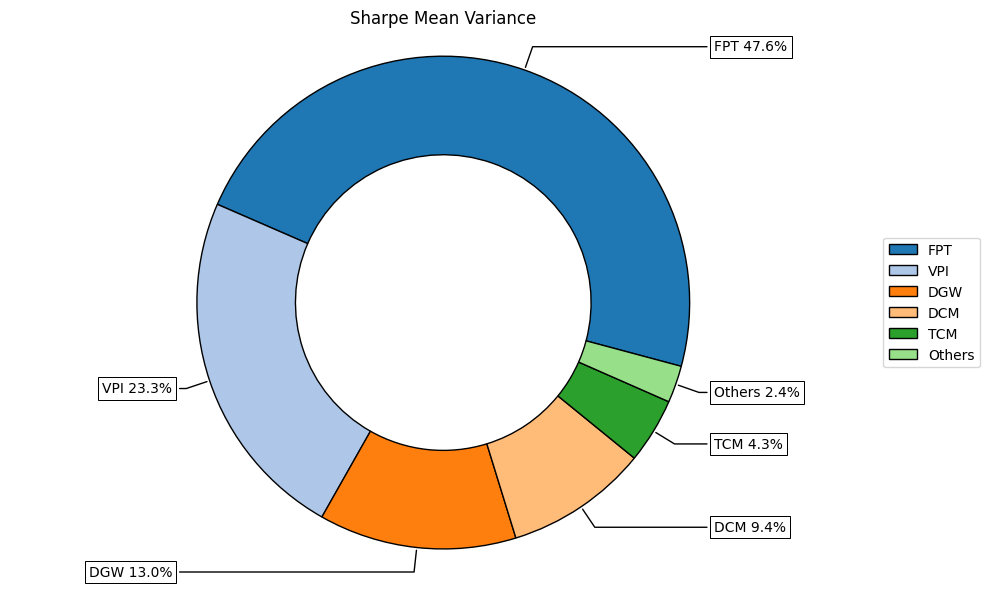

In [ ]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w1, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [ ]:
print(w1)
w2 = np.array(w1['weights'])
print(w2)

          weights
REE  1.078052e-10
OGC  1.072981e-10
FPT  4.763850e-01
VPI  2.333039e-01
DGW  1.295995e-01
DCM  9.362323e-02
VPG  2.424932e-02
TCM  4.283909e-02
VOS  9.843602e-11
PET  1.373637e-10
[1.07805209e-10 1.07298140e-10 4.76384973e-01 2.33303940e-01
 1.29599454e-01 9.36232279e-02 2.42493178e-02 4.28390867e-02
 9.84360151e-11 1.37363725e-10]


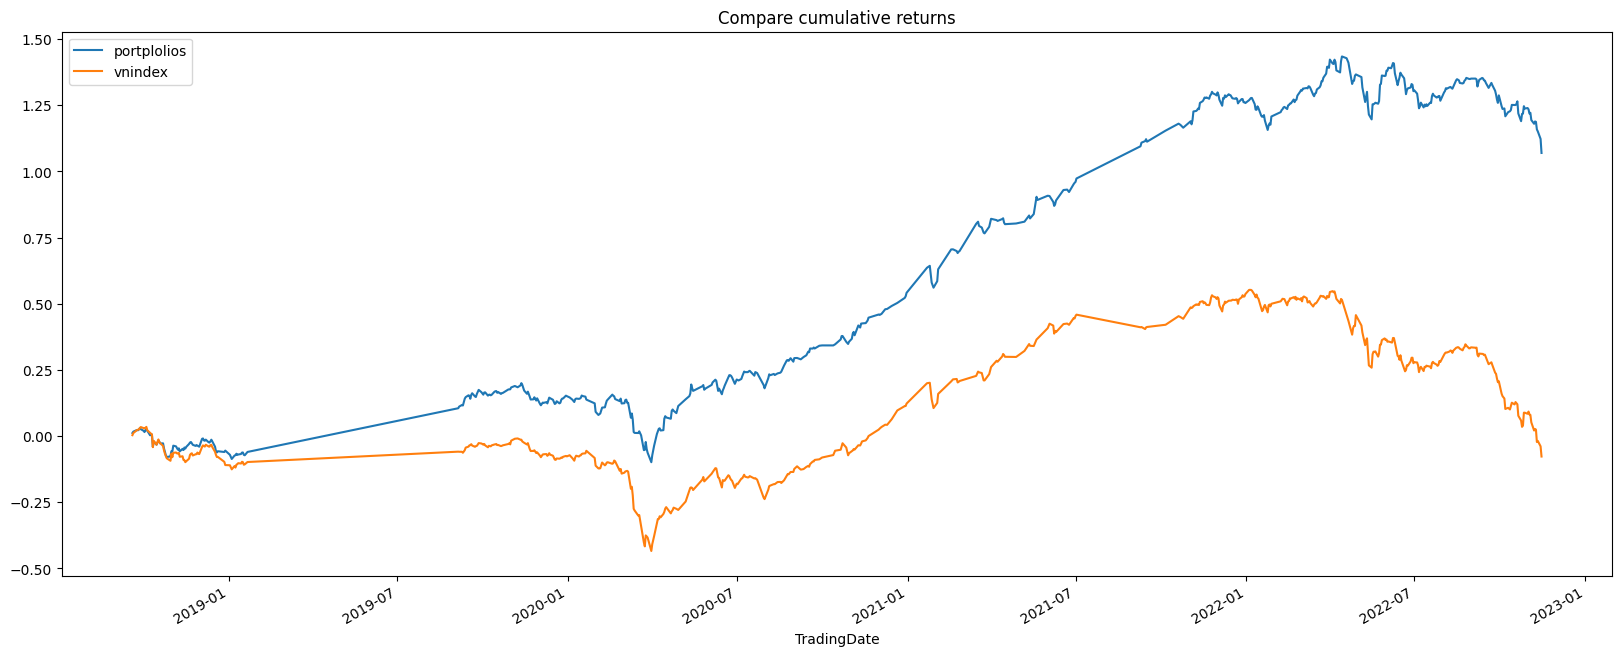

In [ ]:

returns_port_train =pd.DataFrame(columns=["portplolios"],
                                 data=returns_train[portflolios]@w2)
# so sánh với returns của vnindex
pd.concat([returns_port_train,return_vn_train],axis=1).cumsum().plot(figsize = (20,8),
                                                                     title = "Compare cumulative returns");


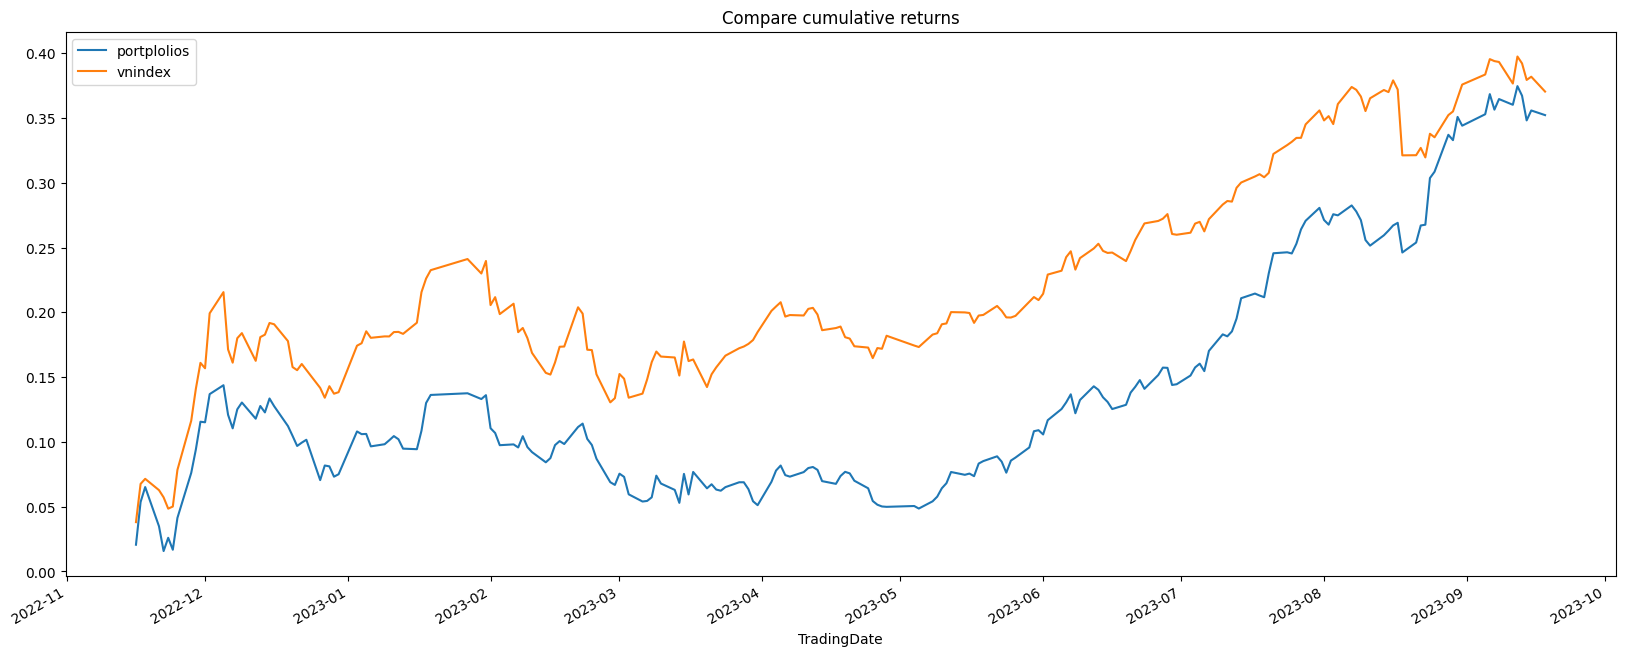

In [ ]:
returns_port_test =pd.DataFrame(columns=["portplolios"],
                                 data=returns_test[portflolios]@w2)

# so sánh với returns của vnindex
pd.concat([returns_port_test,return_vn_test],axis=1).cumsum().plot(figsize = (20,8),
                                                                  title = "Compare cumulative returns");

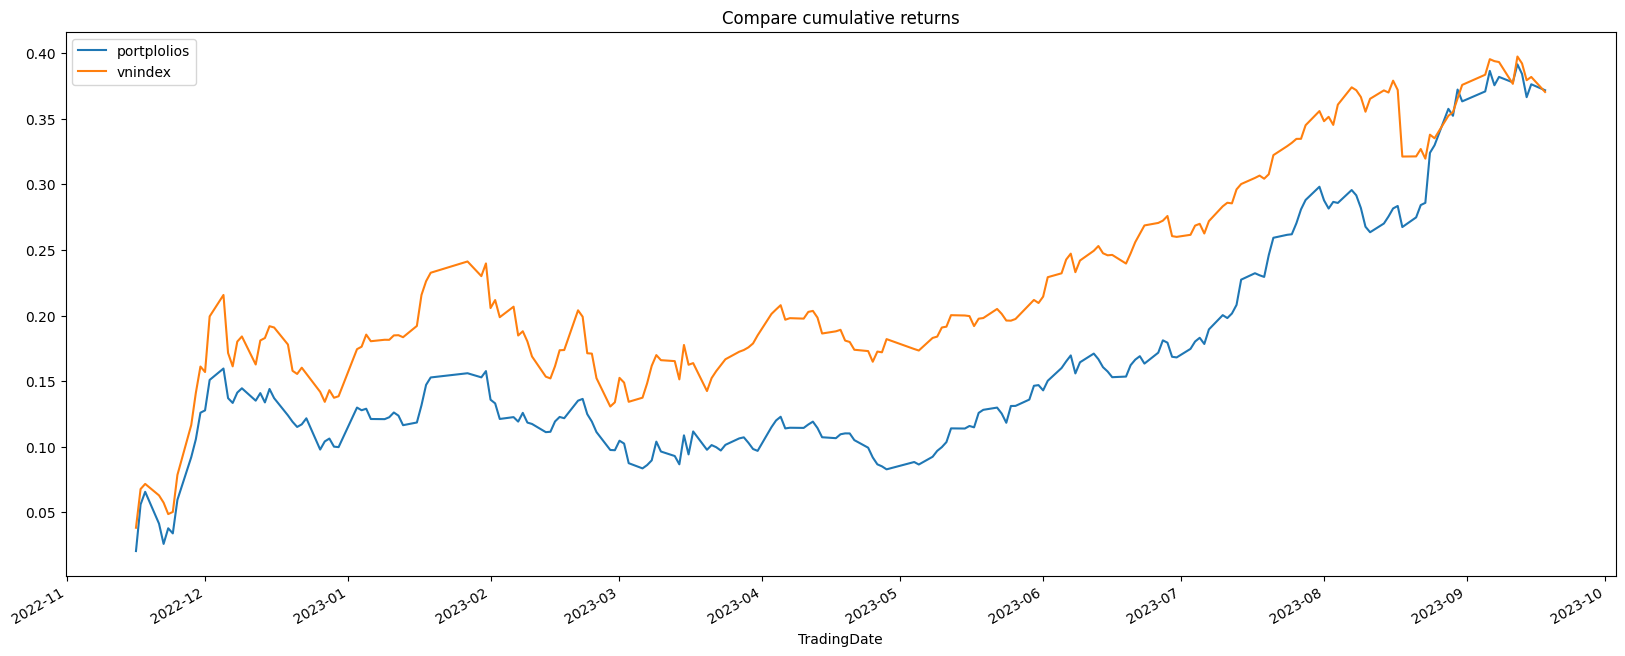

In [ ]:
rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR', 'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']
wl2 = port.optimization(model=model, rm='MAD', obj=obj, rf=rf, l=l, hist=hist)
wl22 = np.array(wl2['weights'])
returns_port_test2 =pd.DataFrame(columns=["portplolios"],
                                 data=returns_test[portflolios]@wl22)

# so sánh với returns của vnindex
pd.concat([returns_port_test2,return_vn_test],axis=1).cumsum().plot(figsize = (20,8),
                                                                  title = "Compare cumulative returns");

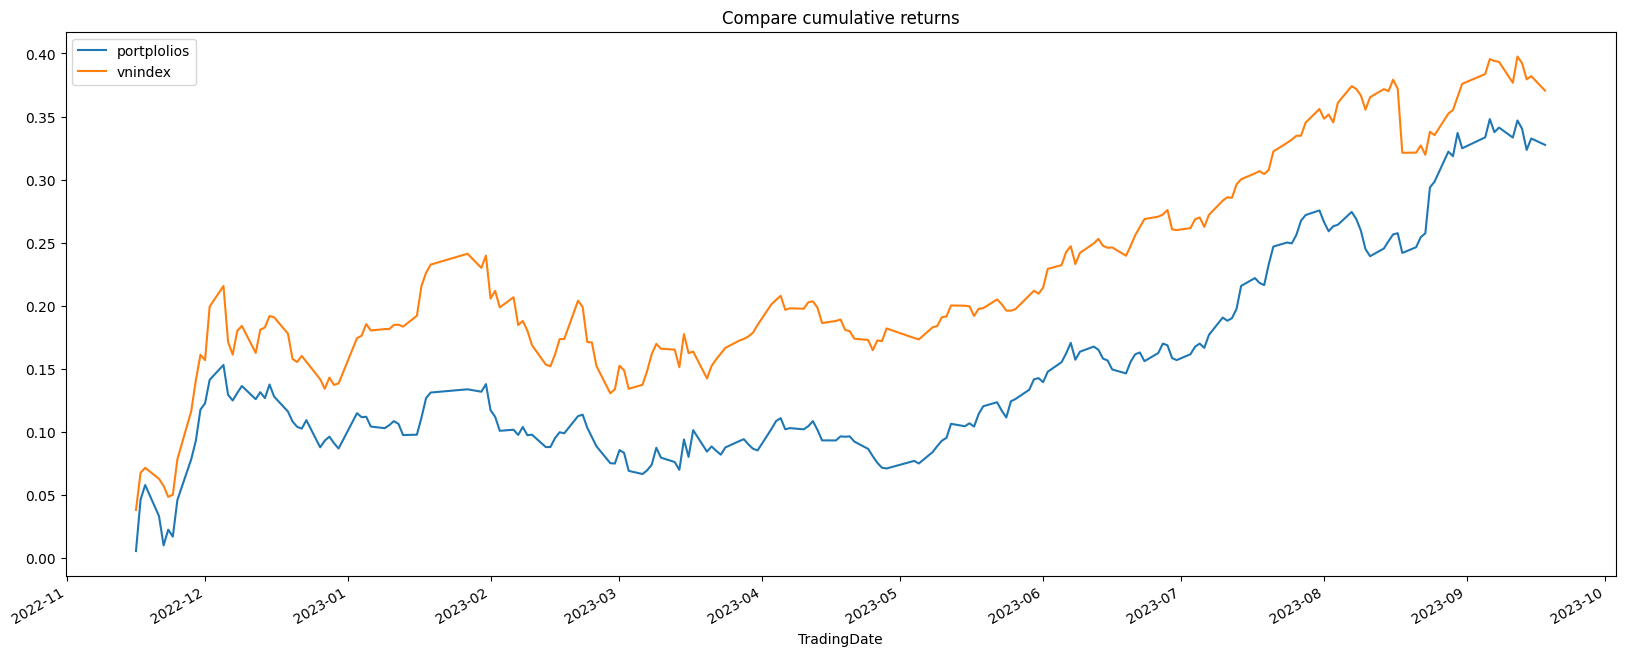

In [ ]:
rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR', 'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']
wl3 = port.optimization(model=model, rm='MSV', obj=obj, rf=rf, l=l, hist=hist)
wl33 = np.array(wl3['weights'])
returns_port_test3 =pd.DataFrame(columns=["portplolios"],
                                 data=returns_test[portflolios]@wl33)

# so sánh với returns của vnindex
pd.concat([returns_port_test3,return_vn_test],axis=1).cumsum().plot(figsize = (20,8),
                                                                  title = "Compare cumulative returns");

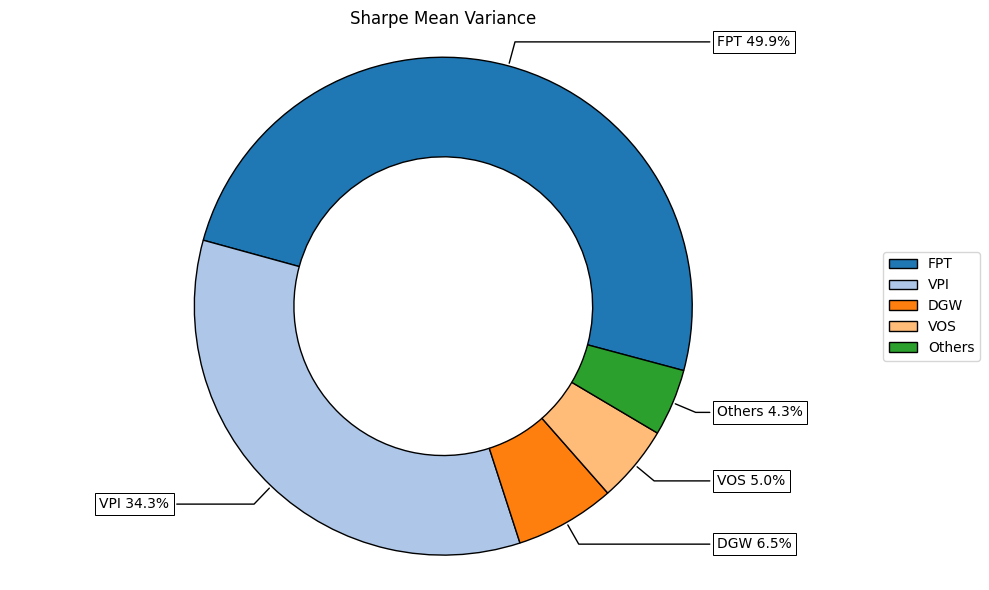

In [ ]:
ax = rp.plot_pie(w=wl3, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

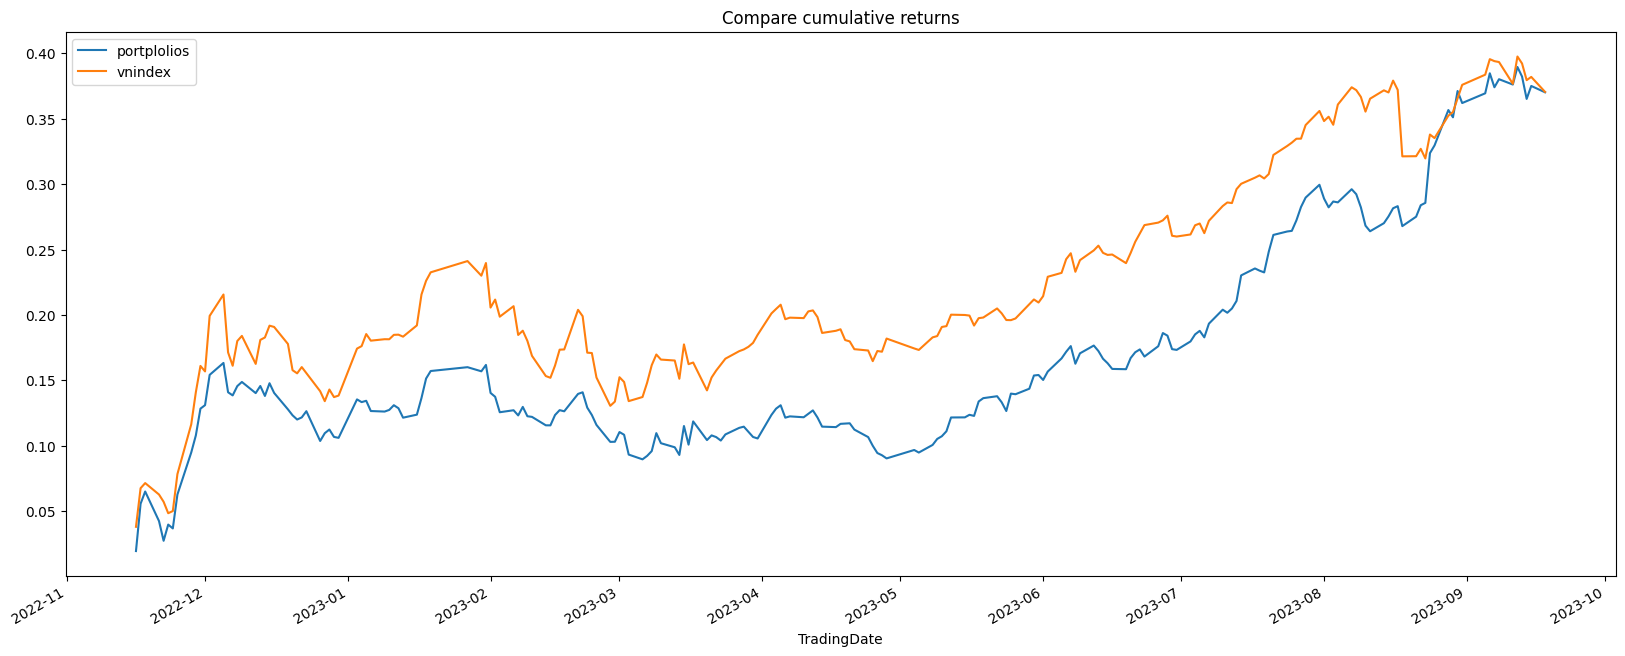

In [ ]:
rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR', 'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']
wl4 = port.optimization(model=model, rm='FLPM', obj=obj, rf=rf, l=l, hist=hist)
wl44 = np.array(wl4['weights'])
returns_port_test4 =pd.DataFrame(columns=["portplolios"],
                                 data=returns_test[portflolios]@wl44)

# so sánh với returns của vnindex
pd.concat([returns_port_test4,return_vn_test],axis=1).cumsum().plot(figsize = (20,8),
                                                                  title = "Compare cumulative returns");

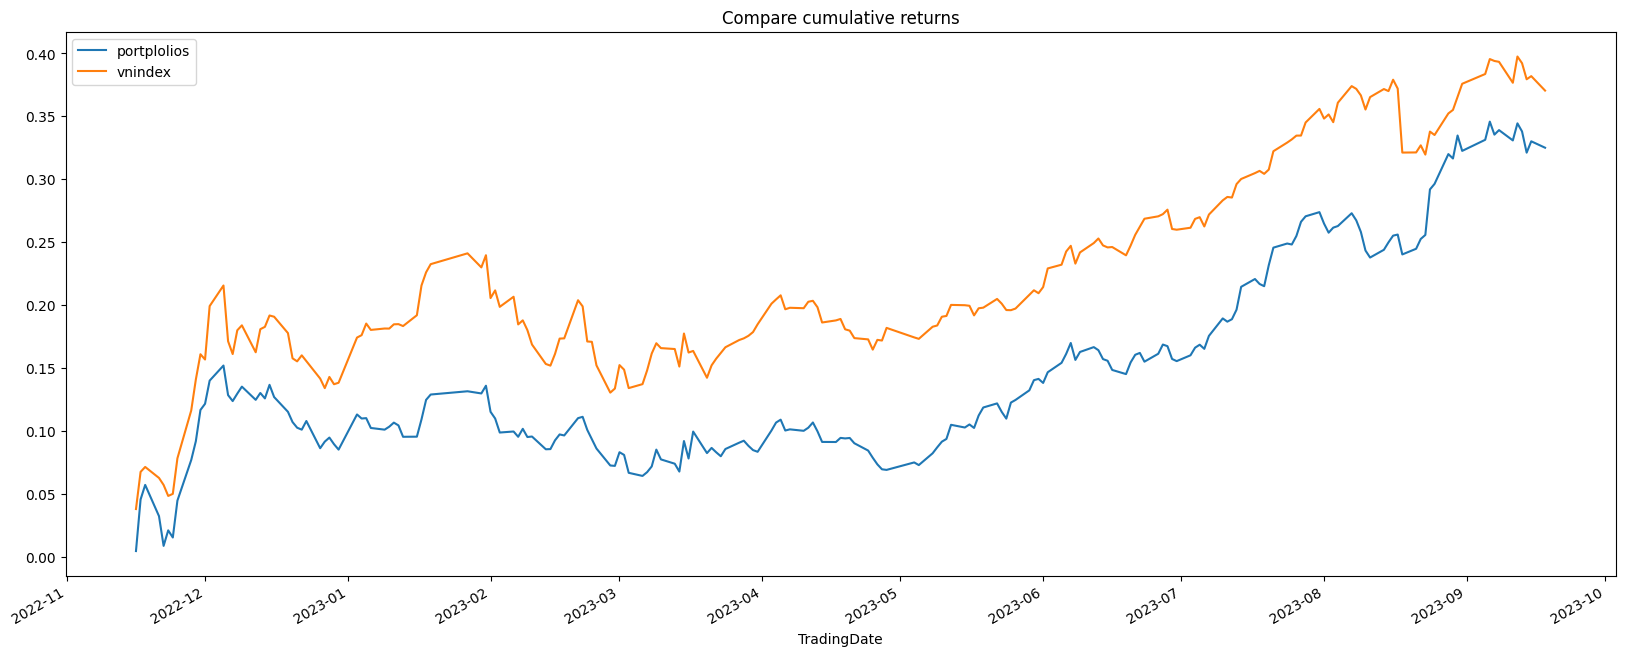

In [ ]:
rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR', 'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']
wl5 = port.optimization(model=model, rm='SLPM', obj=obj, rf=rf, l=l, hist=hist)
wl55 = np.array(wl5['weights'])
returns_port_test5 =pd.DataFrame(columns=["portplolios"],
                                 data=returns_test[portflolios]@wl55)

# so sánh với returns của vnindex
pd.concat([returns_port_test5,return_vn_test],axis=1).cumsum().plot(figsize = (20,8),
                                                                  title = "Compare cumulative returns");

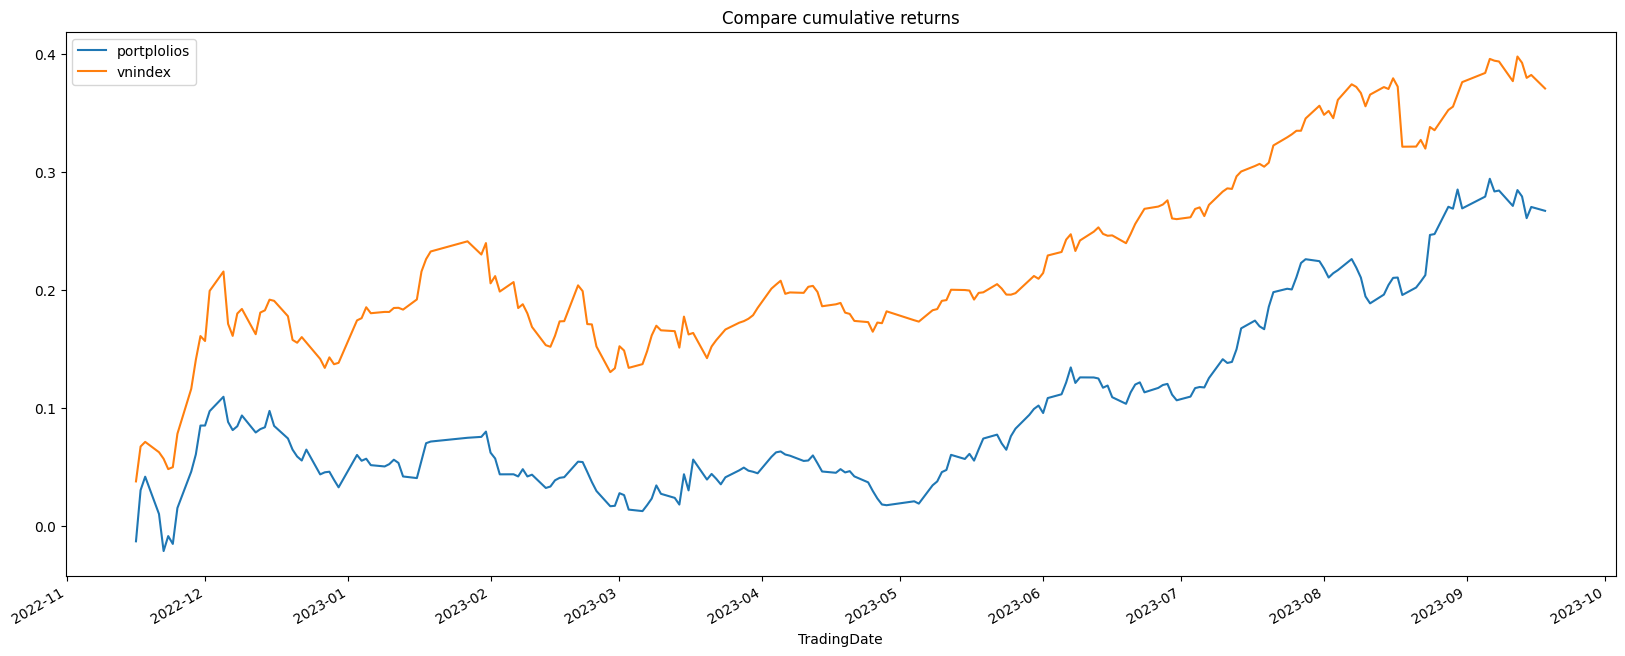

In [ ]:
rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR', 'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']
wl6 = port.optimization(model=model, rm='CVaR', obj=obj, rf=rf, l=l, hist=hist)
wl66 = np.array(wl6['weights'])
returns_port_test6 =pd.DataFrame(columns=["portplolios"],
                                 data=returns_test[portflolios]@wl66)

# so sánh với returns của vnindex
pd.concat([returns_port_test6,return_vn_test],axis=1).cumsum().plot(figsize = (20,8),
                                                                  title = "Compare cumulative returns");

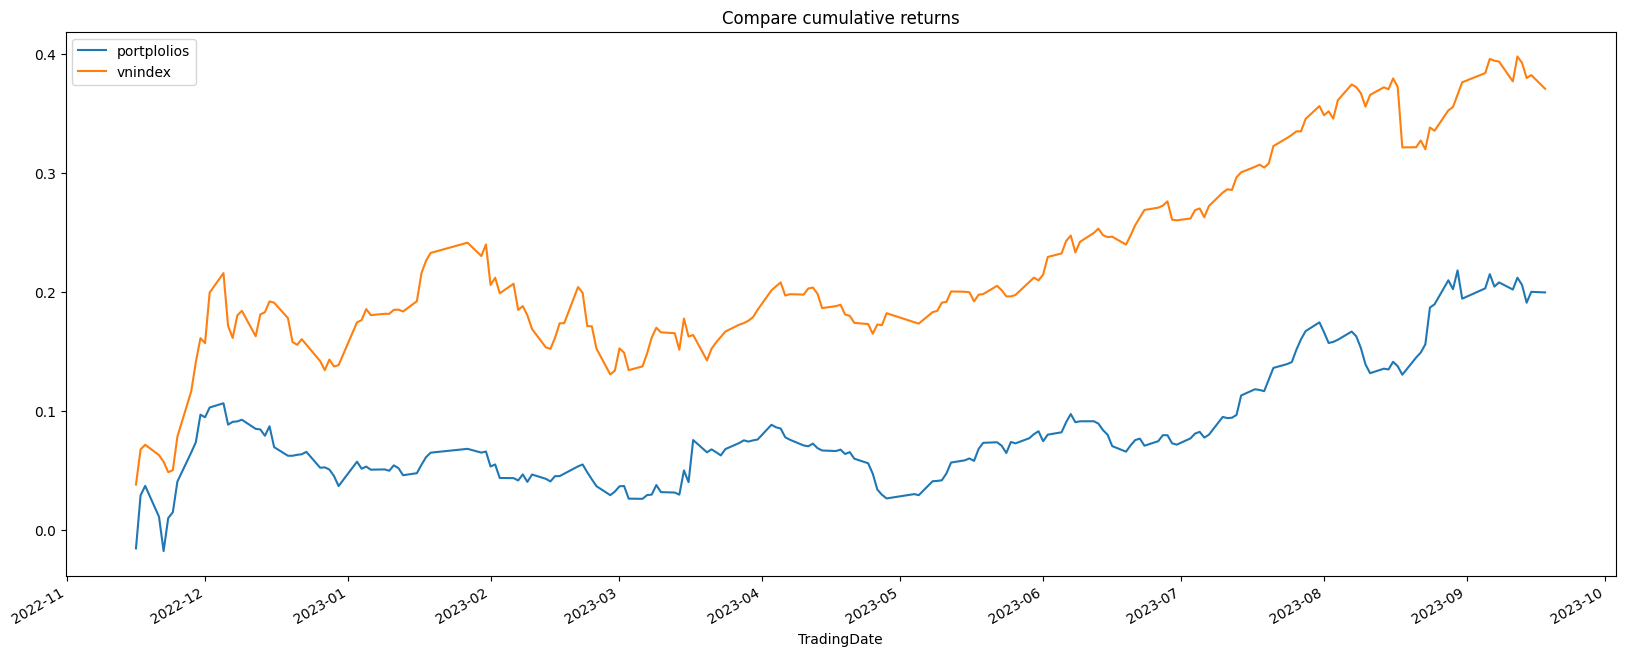

In [ ]:
rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR', 'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']
wl9 = port.optimization(model=model, rm='MDD', obj=obj, rf=rf, l=l, hist=hist)
wl99 = np.array(wl9['weights'])
returns_port_test9 =pd.DataFrame(columns=["portplolios"],
                                 data=returns_test[portflolios]@wl99)

# so sánh với returns của vnindex
pd.concat([returns_port_test9,return_vn_test],axis=1).cumsum().plot(figsize = (20,8),
                                                                  title = "Compare cumulative returns");


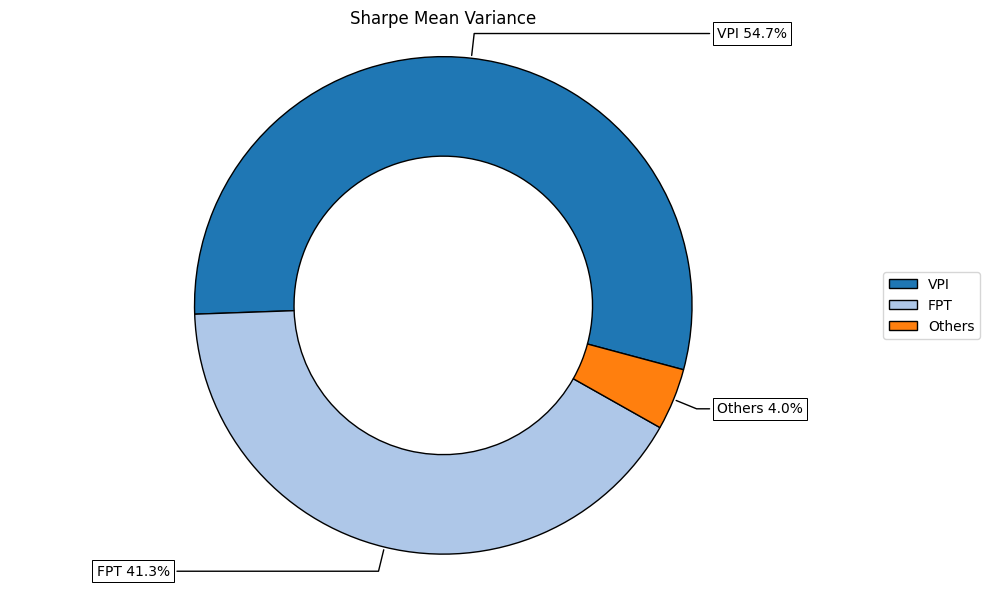

In [ ]:
ax = rp.plot_pie(w=wl9, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

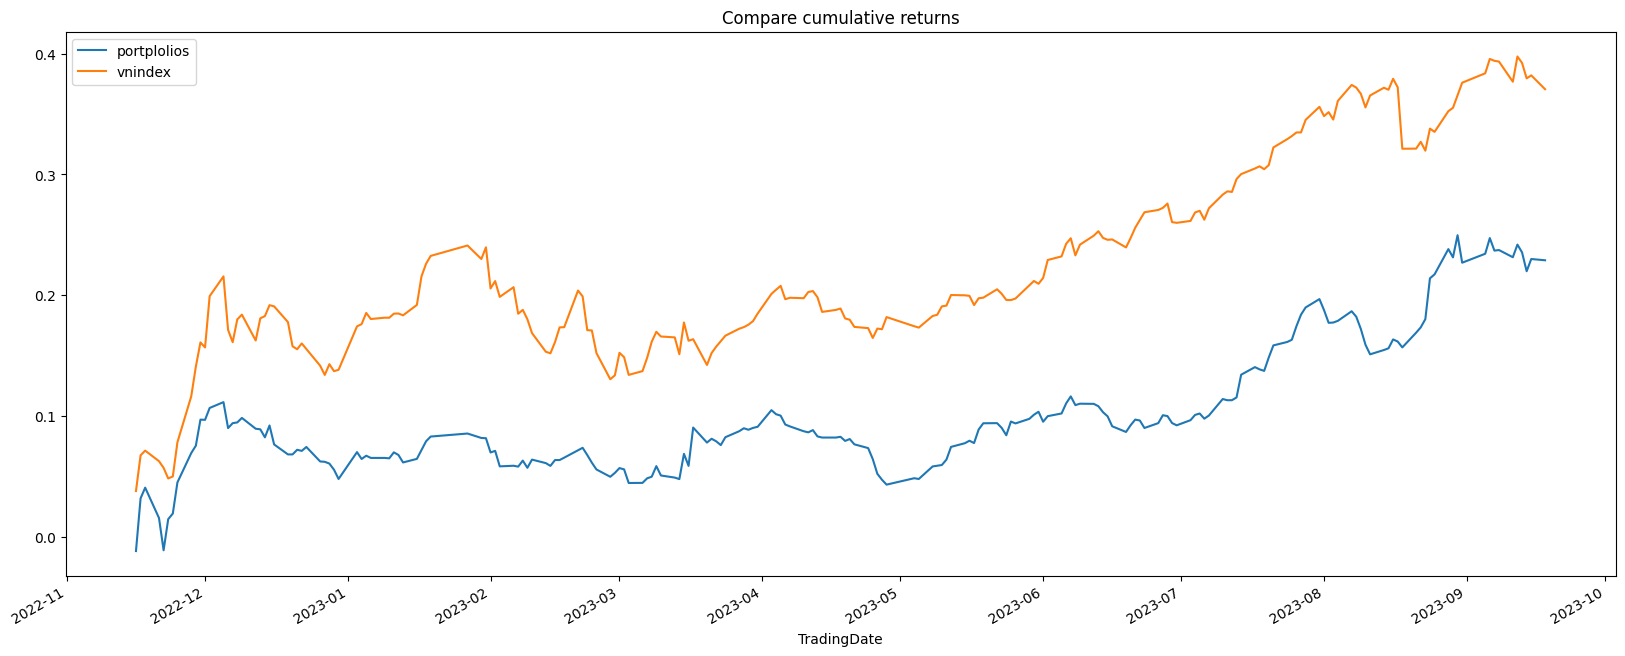

In [ ]:
rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR', 'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']
wl10 = port.optimization(model=model, rm='ADD', obj=obj, rf=rf, l=l, hist=hist)
wl100 = np.array(wl10['weights'])
returns_port_test10 =pd.DataFrame(columns=["portplolios"],
                                 data=returns_test[portflolios]@wl100)

# so sánh với returns của vnindex
pd.concat([returns_port_test10,return_vn_test],axis=1).cumsum().plot(figsize = (20,8),
                                                                  title = "Compare cumulative returns");

In [ ]:
print(wl100)

[2.04832810e-12 1.02731513e-10 4.90478260e-01 5.09521739e-01
 6.09114663e-11 2.27693889e-10 1.14845419e-10 5.89692396e-10
 1.07083140e-10 8.34494180e-11]


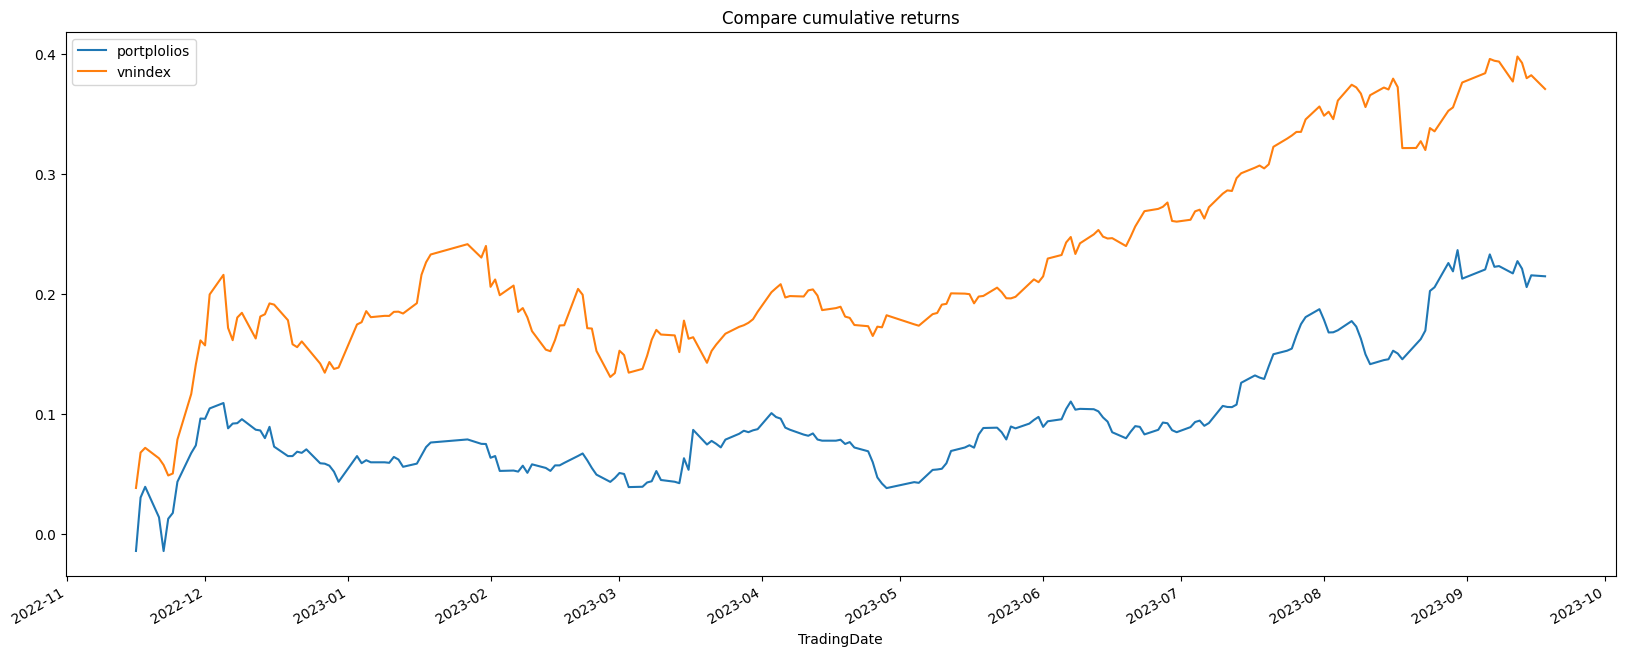

In [ ]:
rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR', 'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']
wl11 = port.optimization(model=model, rm='CDaR', obj=obj, rf=rf, l=l, hist=hist)
wl111 = np.array(wl11['weights'])
returns_port_test11 =pd.DataFrame(columns=["portplolios"],
                                 data=returns_test[portflolios]@wl111)

# so sánh với returns của vnindex
pd.concat([returns_port_test11,return_vn_test],axis=1).cumsum().plot(figsize = (20,8),
                                                                  title = "Compare cumulative returns");

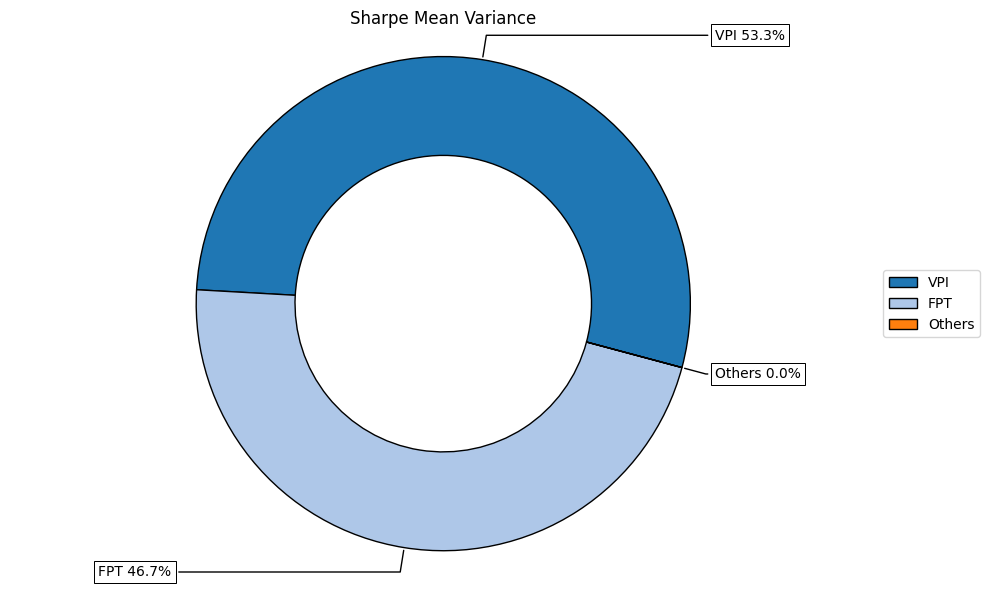

In [ ]:
ax = rp.plot_pie(w=wl11, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

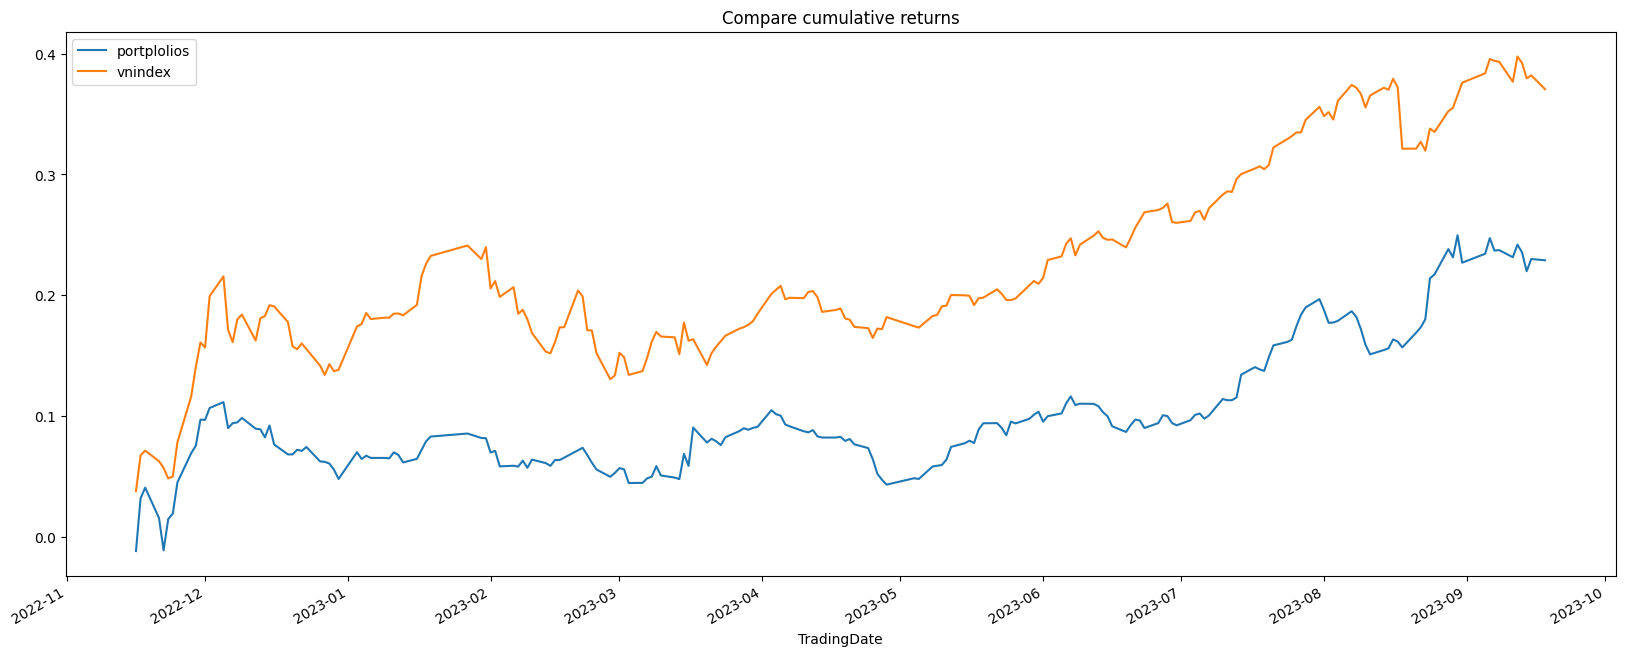

In [ ]:
rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR', 'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']
wl12 = port.optimization(model=model, rm='UCI', obj=obj, rf=rf, l=l, hist=hist)
wl121 = np.array(wl12['weights'])
returns_port_test12 =pd.DataFrame(columns=["portplolios"],
                                 data=returns_test[portflolios]@wl121)

# so sánh với returns của vnindex
pd.concat([returns_port_test12,return_vn_test],axis=1).cumsum().plot(figsize = (20,8),
                                                                  title = "Compare cumulative returns");

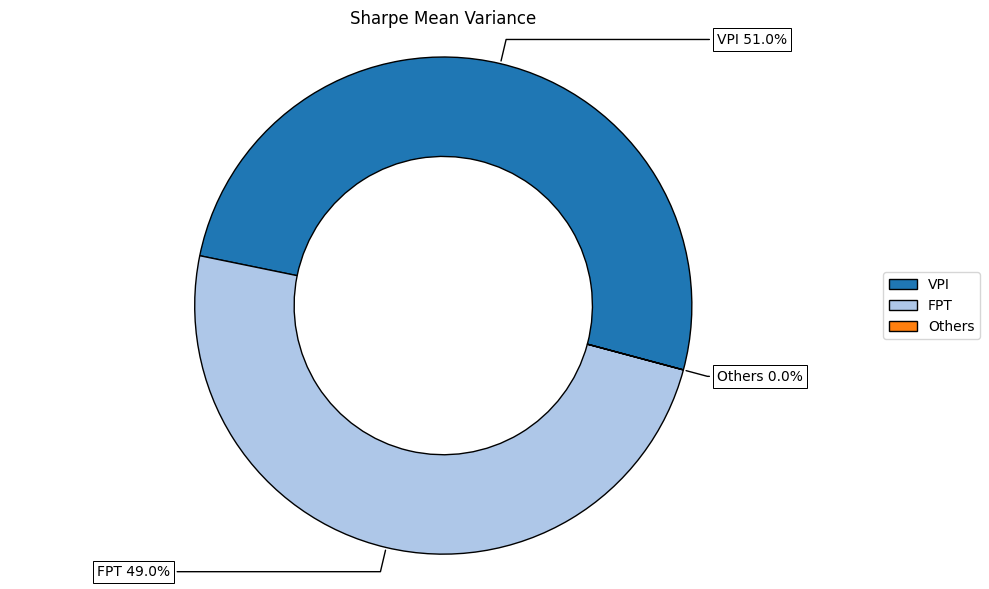

In [ ]:
ax = rp.plot_pie(w=wl12, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

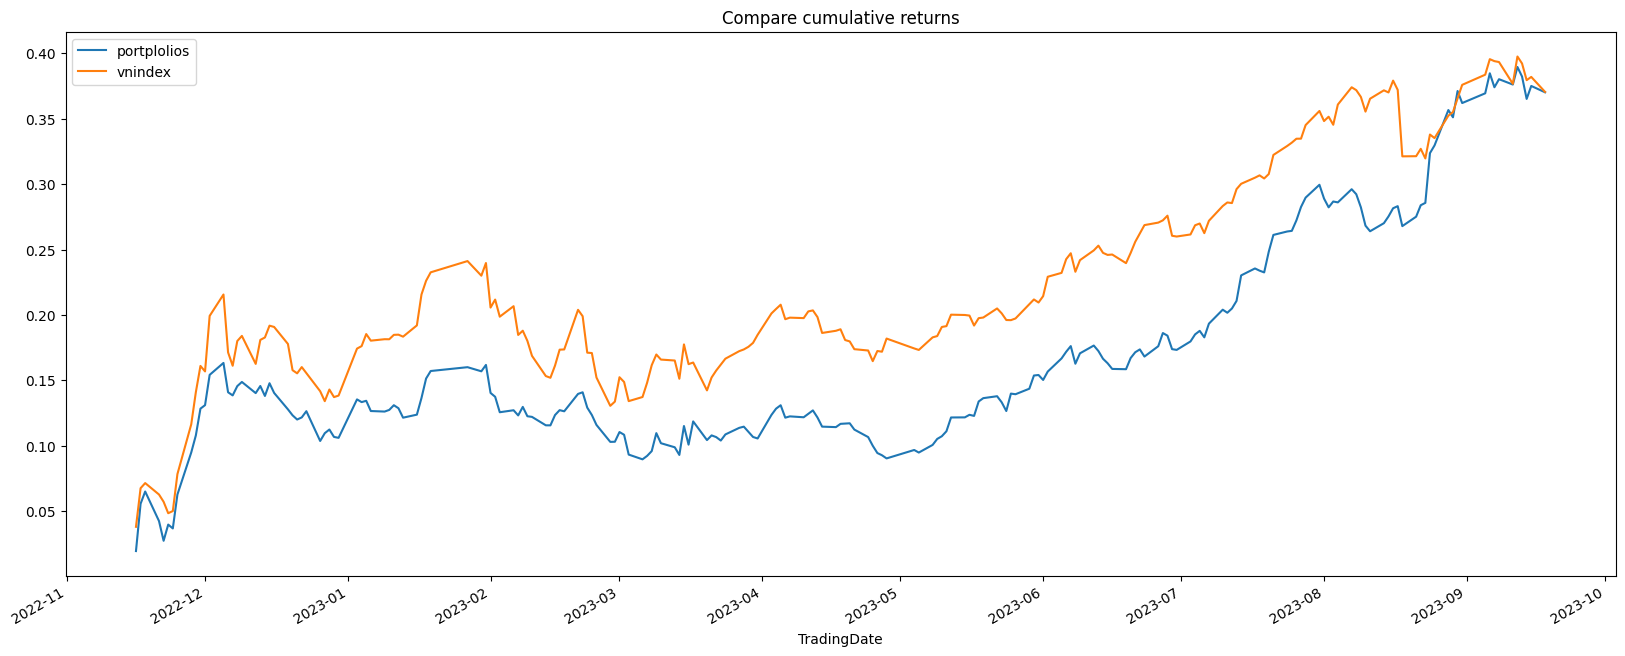

In [ ]:
rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR', 'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']
wl13 = port.optimization(model=model, rm='FLPM', obj=obj, rf=rf, l=l, hist=hist)
wl131 = np.array(wl13['weights'])
returns_port_test13 =pd.DataFrame(columns=["portplolios"],
                                 data=returns_test[portflolios]@wl131)

# so sánh với returns của vnindex
pd.concat([returns_port_test13,return_vn_test],axis=1).cumsum().plot(figsize = (20,8),
                                                                  title = "Compare cumulative returns");